# Sleep Stress Detection System

## Overview
A machine learning-based system designed to predict stress levels through sleep analysis,  
using data collected from smart pillow monitoring devices.

## How It Works
The system analyzes physiological metrics during sleep to classify stress into  
five distinct levels, enabling:

- Early intervention
- Improved health awareness
- Personalized health insights

## Deployment
The system is deployed using **Streamlit**  
to provide real-time stress level predictions.


# DEPENDENCIES

## Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import joblib
import warnings
warnings.filterwarnings('ignore')
sns.set(style="whitegrid")

# DATA ACQUISITION & PREPROCESSING


In [3]:
# Loading the dataset
Data = pd.read_csv("/kaggle/input/human-stress-detection-in-and-through-sleep/SaYoPillow.csv")

# Renaming columns for clarity and consistency
Data.columns = ['Snoring Range', 'Respiration Rate', 'Body Temperature', 'Limb Movement',
                'Blood Oxygen', 'Eye Movement', 'Sleeping Hours', 'Heart Rate', 'Stress Level']

# Creating dual representation: numeric for modeling, categorical for visualization
Data['Stress Numeric'] = Data['Stress Level']
stress_mapping = {0:'low/normal', 1:'medium low', 2:'medium', 3:'medium high', 4:'high'}
Data['Stress Level'] = Data['Stress Level'].replace(stress_mapping)

# EXPLORATORY DATA ANALYSIS


In [5]:
print(f'\nData Shape is: {Data.shape}')


Data Shape is: (630, 10)


In [6]:
print('\nDataset Preview (First 5 Rows):')
display(Data.head())
print('\nDataset Preview (Last 5 Rows):')
display(Data.tail())


Dataset Preview (First 5 Rows):


,Snoring Range,Respiration Rate,Body Temperature,Limb Movement,Blood Oxygen,Eye Movement,Sleeping Hours,Heart Rate,Stress Level,Stress Numeric
0,93.80,25.680,91.840,16.600,89.840,99.60,1.840,74.20,medium high,3
1,91.64,25.104,91.552,15.880,89.552,98.88,1.552,72.76,medium high,3
2,60.00,20.000,96.000,10.000,95.000,85.00,7.000,60.00,medium low,1
3,85.76,23.536,90.768,13.920,88.768,96.92,0.768,68.84,medium high,3
4,48.12,17.248,97.872,6.496,96.248,72.48,8.248,53.12,low/normal,0



Dataset Preview (Last 5 Rows):


,Snoring Range,Respiration Rate,Body Temperature,Limb Movement,Blood Oxygen,Eye Movement,Sleeping Hours,Heart Rate,Stress Level,Stress Numeric
625,69.600,20.960,92.960,10.960,90.960,89.80,3.440,62.40,medium,2
626,48.440,17.376,98.064,6.752,96.376,73.76,8.376,53.44,low/normal,0
627,97.504,27.504,86.880,17.752,84.256,101.88,0.000,78.76,high,4
628,58.640,19.728,95.728,9.728,94.592,84.32,6.728,59.32,medium low,1
629,73.920,21.392,93.392,11.392,91.392,91.96,4.088,63.48,medium,2


In [7]:
# Data integrity verification
print('\nMissing Values Check:')
display(Data.isnull().sum().to_frame('Null Values'))


Missing Values Check:


,Null Values
Snoring Range,0
Respiration Rate,0
Body Temperature,0
Limb Movement,0
Blood Oxygen,0
Eye Movement,0
Sleeping Hours,0
Heart Rate,0
Stress Level,0
Stress Numeric,0


In [8]:
print('\nData Information:')
Data.info()


Data Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 630 entries, 0 to 629
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Snoring Range     630 non-null    float64
 1   Respiration Rate  630 non-null    float64
 2   Body Temperature  630 non-null    float64
 3   Limb Movement     630 non-null    float64
 4   Blood Oxygen      630 non-null    float64
 5   Eye Movement      630 non-null    float64
 6   Sleeping Hours    630 non-null    float64
 7   Heart Rate        630 non-null    float64
 8   Stress Level      630 non-null    object 
 9   Stress Numeric    630 non-null    int64  
dtypes: float64(8), int64(1), object(1)
memory usage: 49.3+ KB


In [9]:
print('\nStatistical Summary:')
display(Data.describe().T)


Statistical Summary:


,count,mean,std,min,25%,50%,75%,max
Snoring Range,630.0,71.6,19.372833,45.0,52.50,70.0,91.25,100.0
Respiration Rate,630.0,21.8,3.966111,16.0,18.50,21.0,25.00,30.0
Body Temperature,630.0,92.8,3.529690,85.0,90.50,93.0,95.50,99.0
Limb Movement,630.0,11.7,4.299629,4.0,8.50,11.0,15.75,19.0
Blood Oxygen,630.0,90.9,3.902483,82.0,88.50,91.0,94.25,97.0
Eye Movement,630.0,88.5,11.893747,60.0,81.25,90.0,98.75,105.0
Sleeping Hours,630.0,3.7,3.054572,0.0,0.50,3.5,6.50,9.0
Heart Rate,630.0,64.5,9.915277,50.0,56.25,62.5,72.50,85.0
Stress Numeric,630.0,2.0,1.415337,0.0,1.00,2.0,3.00,4.0


In [10]:
# Distribution analysis - detecting potential biases
print('\nSkewness of Numerical Data:')
print(Data.select_dtypes(include=[np.number]).skew())


Skewness of Numerical Data:
Snoring Range       0.113935
Respiration Rate    0.455863
Body Temperature   -0.285751
Limb Movement       0.162667
Blood Oxygen       -0.360655
Eye Movement       -0.573879
Sleeping Hours      0.175113
Heart Rate          0.455863
Stress Numeric      0.000000
dtype: float64


In [12]:
# Stress level profiling - identifying physiological markers
print('\n Grouped Statistics by Stress Level')
grouped_stats = Data.groupby('Stress Level')[['Snoring Range', 'Respiration Rate', 'Heart Rate', 'Blood Oxygen', 'Sleeping Hours']].agg(['mean', 'min', 'max'])
display(grouped_stats)


 Grouped Statistics by Stress Level


Snoring Range              Respiration Rate              \
                      mean   min    max             mean   min   max   
Stress Level                                                           
high                  98.0  96.0  100.0             28.0  26.0  30.0   
low/normal            47.5  45.0   50.0             17.0  16.0  18.0   
medium                70.0  60.0   80.0             21.0  20.0  22.0   
medium high           87.5  80.0   95.0             24.0  22.0  26.0   
medium low            55.0  50.0   60.0             19.0  18.0  20.0   

             Heart Rate             Blood Oxygen             Sleeping Hours  \
                   mean   min   max         mean   min   max           mean   
Stress Level                                                                  
high               80.0  75.0  85.0         85.0  82.0  88.0            0.0   
low/normal         52.5  50.0  55.0         96.0  95.0  97.0            8.0   
medium             62.5  60.0  65.0         91.0  90.0  92.0            3.5   
medium high        70.0  65.0  75.0         89.0  88.0  90.0            1.0   
medium low         57.5  55.0  60.0         93.5  92.0  95.0            6.0   

                        
              min  max  
Stress Level            
high          0.0  0.0  
low/normal    7.0  9.0  
medium        2.0  5.0  
medium high   0.0  2.0  
medium low    5.0  7.0

In [11]:
# Threshold analysis for classification boundaries
print('\nFeature Thresholds Analysis:')
for level in sorted(Data['Stress Level'].unique()):
    subset = Data[Data['Stress Level'] == level]
    print(f"\nStress Level: {level}")
    print(f" - Heart Rate Range: {subset['Heart Rate'].min()} - {subset['Heart Rate'].max()}")
    print(f" - Snoring Range:    {subset['Snoring Range'].min()} - {subset['Snoring Range'].max()}")


Feature Thresholds Analysis:

Stress Level: high
 - Heart Rate Range: 75.0 - 85.0
 - Snoring Range:    96.0 - 100.0

Stress Level: low/normal
 - Heart Rate Range: 50.0 - 55.0
 - Snoring Range:    45.0 - 50.0

Stress Level: medium
 - Heart Rate Range: 60.0 - 65.0
 - Snoring Range:    60.0 - 80.0

Stress Level: medium high
 - Heart Rate Range: 65.0 - 75.0
 - Snoring Range:    80.0 - 95.0

Stress Level: medium low
 - Heart Rate Range: 55.0 - 60.0
 - Snoring Range:    50.0 - 60.0


# DATA VISUALIZATION


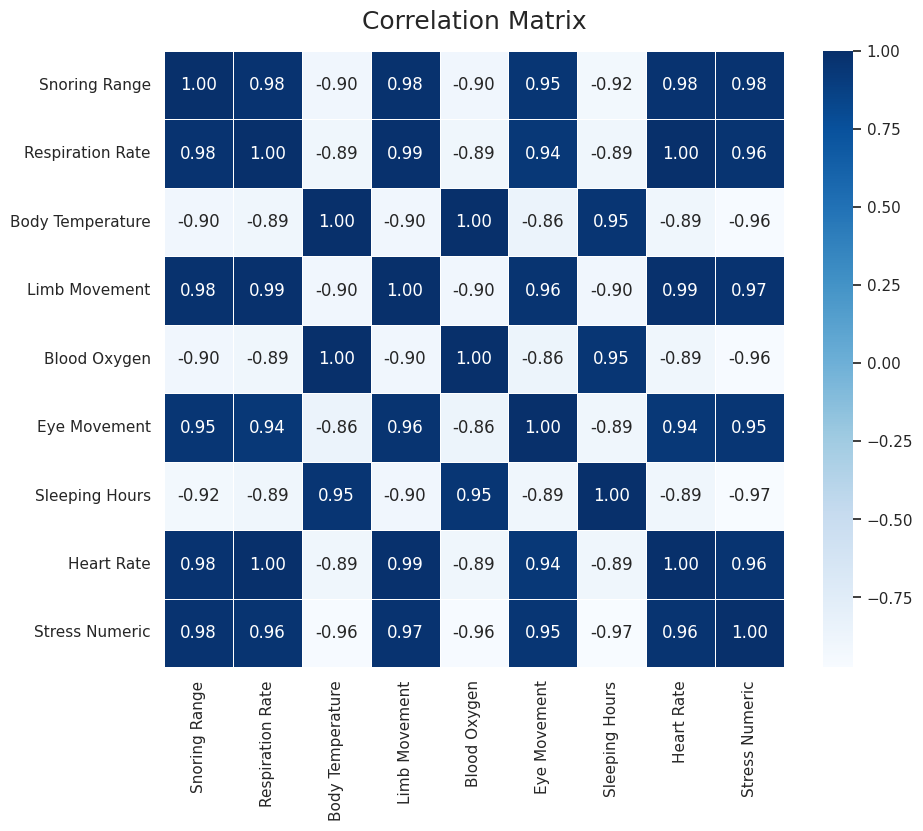

In [13]:
# Correlation heatmap - revealing interdependencies between features
plt.figure(figsize=(10, 8))
corr = Data.drop('Stress Level', axis=1).corr()
heatmap = sns.heatmap(corr, annot=True, cmap='Blues', fmt=".2f", linewidths=0.5)
heatmap.set_title('Correlation Matrix', fontdict={'fontsize':18}, pad=16)
plt.show()

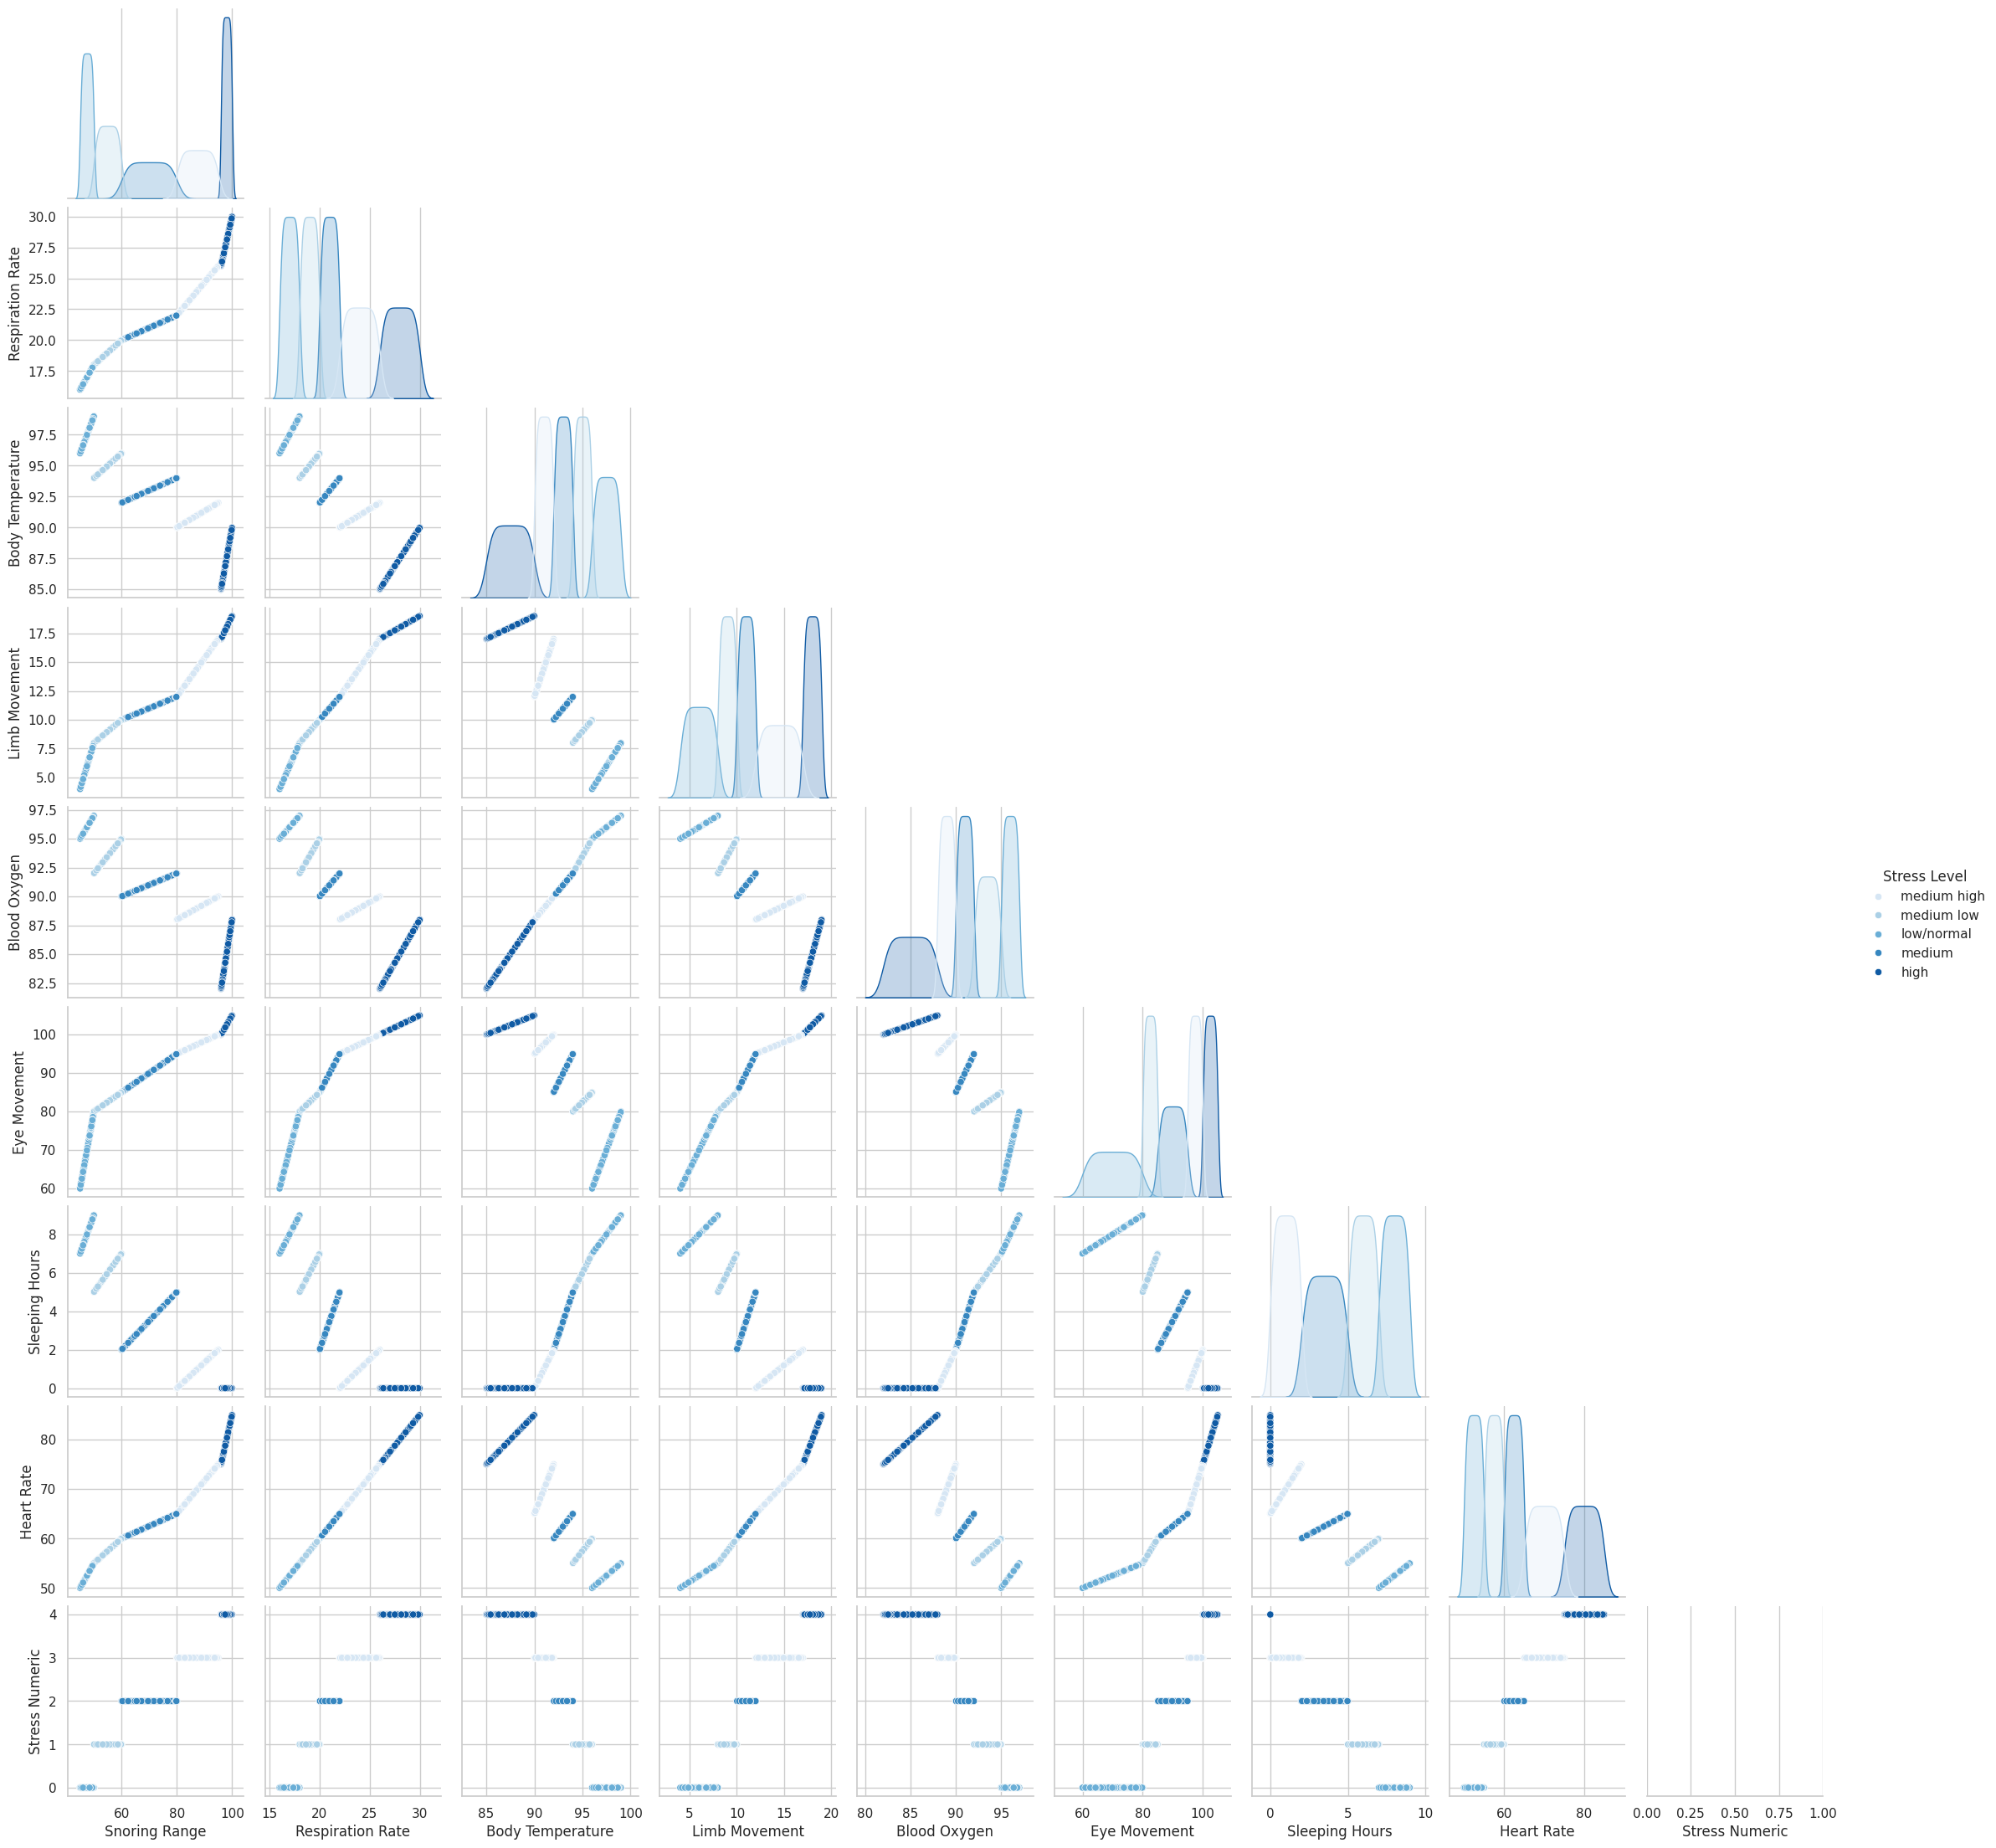

In [14]:
# Pairwise feature relationships
Data_Plot = Data.copy()
sns.pairplot(Data, hue='Stress Level', palette='Blues', corner=True)
plt.show()

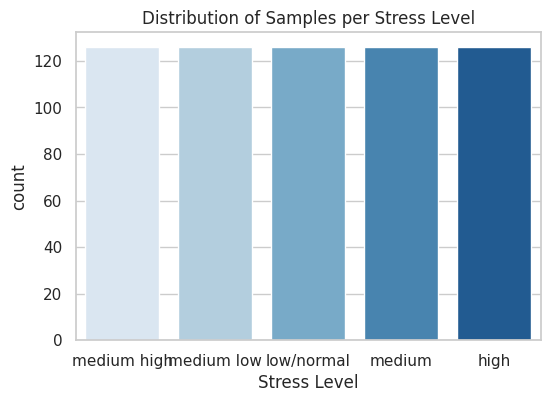

In [15]:
# Class distribution analysis
plt.figure(figsize=(6, 4))
sns.countplot(x='Stress Level', data=Data, palette='Blues') 
plt.title('Distribution of Samples per Stress Level')
plt.show()

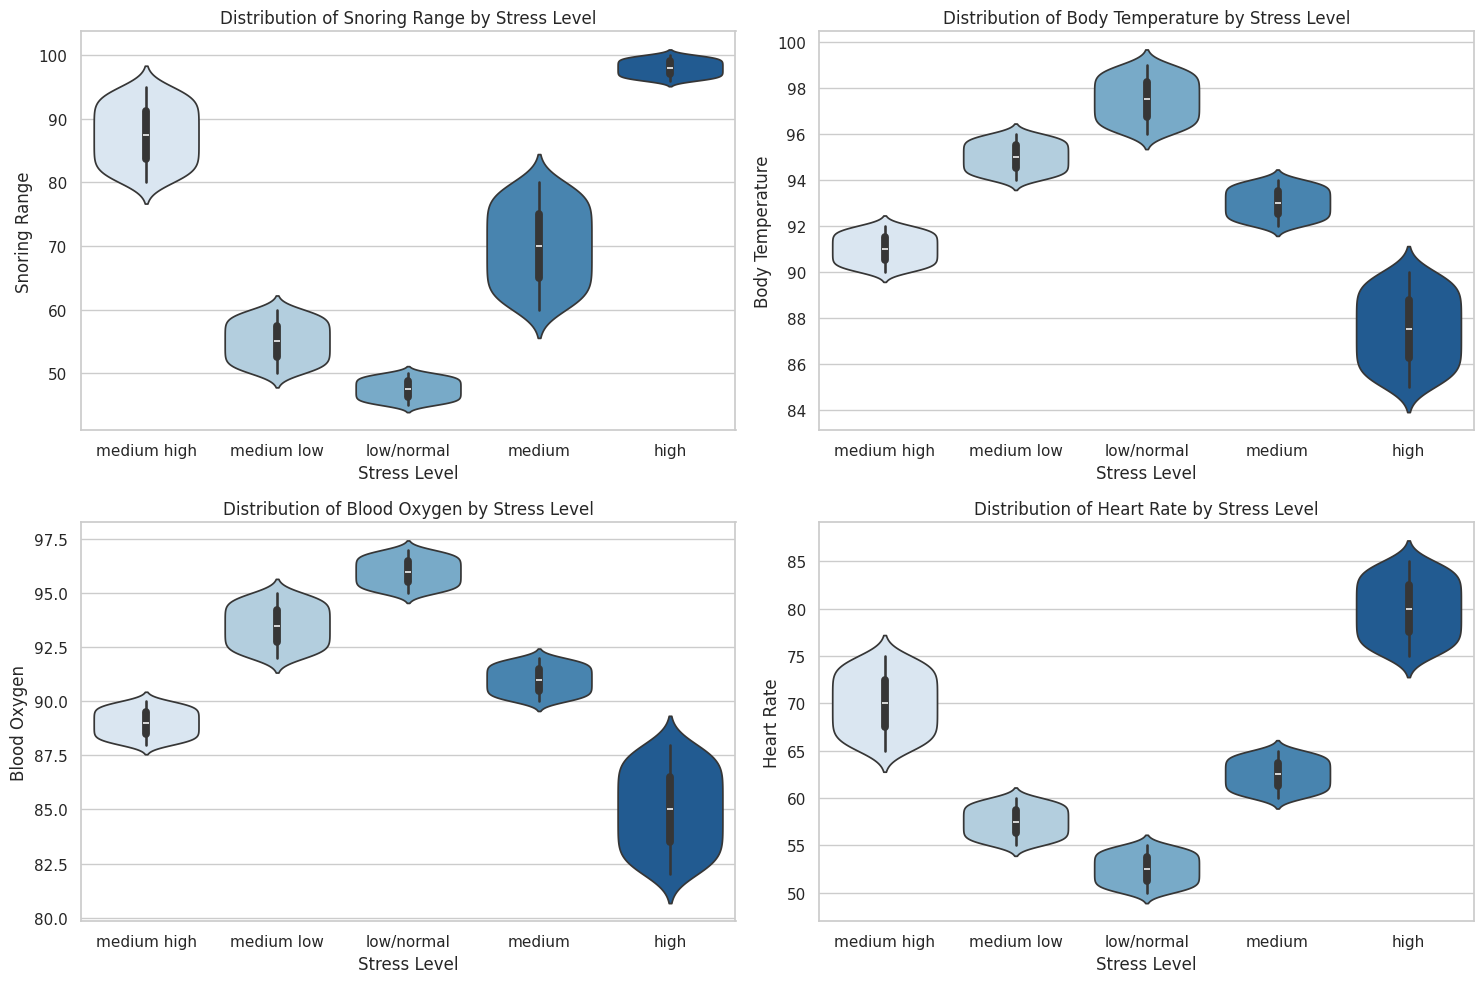

In [19]:
# Feature distribution across stress categories
Data_Plot = Data.copy()
plt.figure(figsize=(15, 10))
features_to_plot = ['Snoring Range', 'Body Temperature', 'Blood Oxygen', 'Heart Rate']

for i, col in enumerate(features_to_plot):
    plt.subplot(2, 2, i+1)
    sns.violinplot(x='Stress Level', y=col, data=Data_Plot, palette='Blues')
    plt.title(f'Distribution of {col} by Stress Level')
plt.tight_layout()
plt.show()

# FEATURE ENGINEERING & DATA SPLITTING


In [20]:
X = Data.drop(['Stress Level', 'Stress Numeric'], axis=1)
y= Data.iloc[:,-1]
y= Data['Stress Numeric']

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"Training Data: X= {X_train.shape}, y= {y_train.shape}")
print(f"Testing Data:  X= {X_test.shape}, y= {y_test.shape}")

Training Data: X= (504, 8), y= (504,)
Testing Data:  X= (126, 8), y= (126,)


In [22]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# MODEL TRAINING & EVALUATION


In [23]:
# Model 1: Logistic Regression - Baseline linear classifier
lr_model = LogisticRegression(max_iter=1000, random_state=42)
lr_model.fit(X_train_scaled, y_train)
y_pred_lr = lr_model.predict(X_test_scaled)

lr_acc = accuracy_score(y_test, y_pred_lr)
print(f"Logistic Regression Accuracy: {lr_acc:.2%}")
print("-" * 40)
print("Detailed Report:\n")
print(classification_report(y_test, y_pred_lr))

Logistic Regression Accuracy: 100.00%
----------------------------------------
Detailed Report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        23
           1       1.00      1.00      1.00        24
           2       1.00      1.00      1.00        28
           3       1.00      1.00      1.00        26
           4       1.00      1.00      1.00        25

    accuracy                           1.00       126
   macro avg       1.00      1.00      1.00       126
weighted avg       1.00      1.00      1.00       126



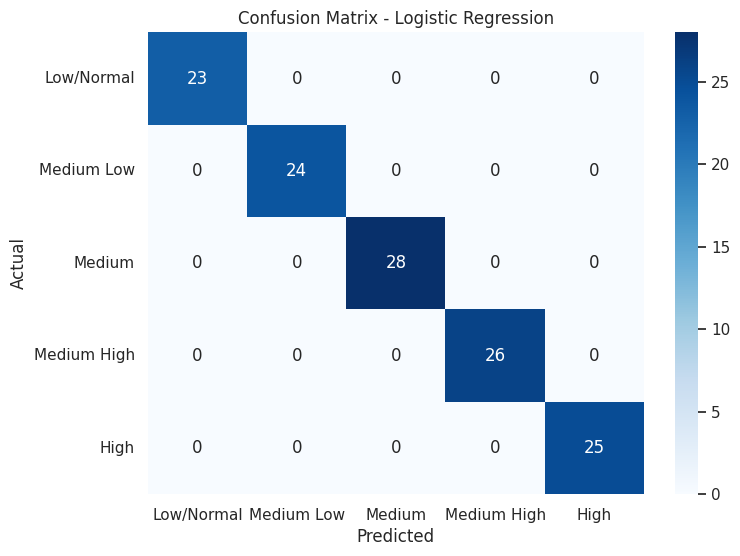

In [24]:
plt.figure(figsize=(8, 6))
labels = ['Low/Normal', 'Medium Low', 'Medium', 'Medium High', 'High']
sns.heatmap(confusion_matrix(y_test, y_pred_lr), annot=True, fmt='d', cmap='Blues',
            xticklabels=labels, yticklabels=labels)
plt.title('Confusion Matrix - Logistic Regression')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [25]:
# Model 2: Support Vector Machine - Optimal hyperplane separation
svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(X_train_scaled, y_train)
y_pred_svm = svm_model.predict(X_test_scaled)

svm_acc = accuracy_score(y_test, y_pred_svm)
print(f"SVM Accuracy: {svm_acc:.2%}")
print("-" * 40)
print("Detailed Report:\n")
print(classification_report(y_test, y_pred_svm))

SVM Accuracy: 100.00%
----------------------------------------
Detailed Report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        23
           1       1.00      1.00      1.00        24
           2       1.00      1.00      1.00        28
           3       1.00      1.00      1.00        26
           4       1.00      1.00      1.00        25

    accuracy                           1.00       126
   macro avg       1.00      1.00      1.00       126
weighted avg       1.00      1.00      1.00       126



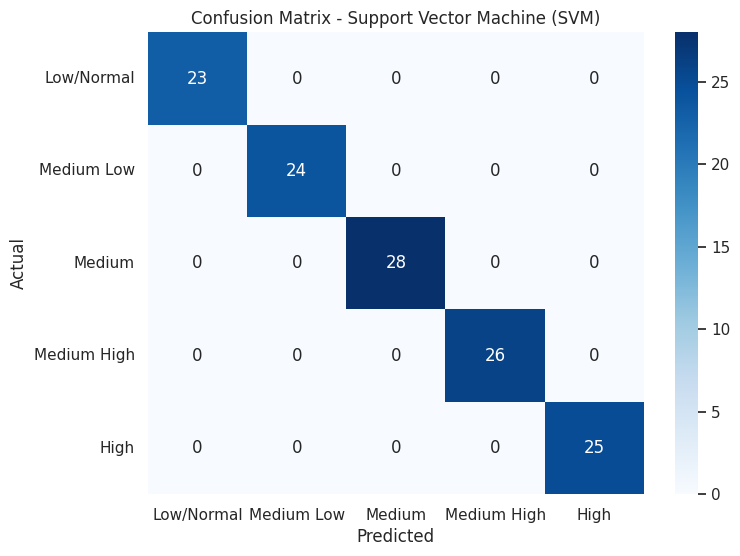

In [26]:
plt.figure(figsize=(8, 6))
labels = ['Low/Normal', 'Medium Low', 'Medium', 'Medium High', 'High']
sns.heatmap(confusion_matrix(y_test, y_pred_svm), annot=True, fmt='d', cmap='Blues',
            xticklabels=labels, yticklabels=labels)
plt.title('Confusion Matrix - Support Vector Machine (SVM)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [27]:
# Model 3: Random Forest - Ensemble learning with feature importance
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)
y_pred_rf = rf_model.predict(X_test_scaled)
rf_acc = accuracy_score(y_test, y_pred_rf)

print(f"Random Forest Accuracy: {rf_acc:.2%}")
print("-" * 40)
print("Detailed Report:\n")
print(classification_report(y_test, y_pred_rf))

Random Forest Accuracy: 97.62%
----------------------------------------
Detailed Report:

              precision    recall  f1-score   support

           0       0.96      1.00      0.98        23
           1       1.00      0.92      0.96        24
           2       0.97      1.00      0.98        28
           3       1.00      0.96      0.98        26
           4       0.96      1.00      0.98        25

    accuracy                           0.98       126
   macro avg       0.98      0.98      0.98       126
weighted avg       0.98      0.98      0.98       126



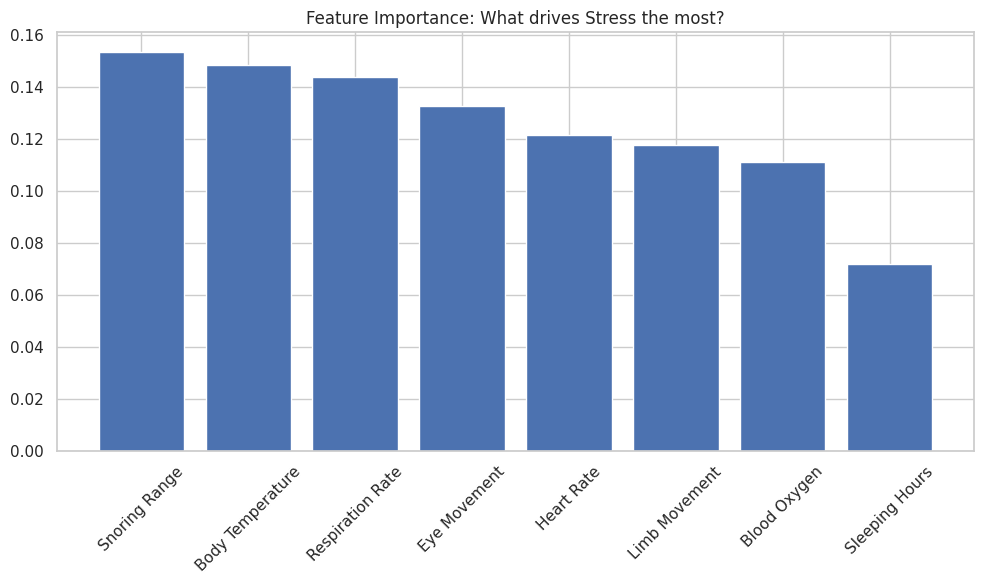

In [28]:
# Feature importance extraction - identifying key stress indicators
importances = rf_model.feature_importances_
feature_names = X.columns 
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10, 6))
plt.title("Feature Importance: What drives Stress the most?")
plt.bar(range(X.shape[1]), importances[indices], align="center", color='b')
plt.xticks(range(X.shape[1]), feature_names[indices], rotation=45)
plt.tight_layout()
plt.show()

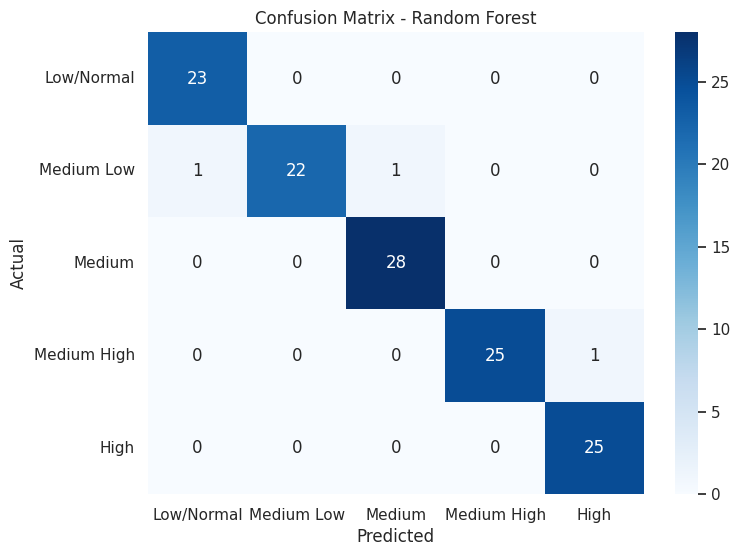

In [29]:
plt.figure(figsize=(8, 6))
labels = ['Low/Normal', 'Medium Low', 'Medium', 'Medium High', 'High']
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt='d', cmap='Blues',
            xticklabels=labels, yticklabels=labels)
plt.title('Confusion Matrix - Random Forest')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [30]:
# Model 4: Neural Network - Deep learning architecture
ann_model = MLPClassifier(hidden_layer_sizes=(16, 16), activation='relu', solver='adam', 
                          max_iter=2000, random_state=42)

ann_model.fit(X_train_scaled, y_train)
y_pred_ann = ann_model.predict(X_test_scaled)
ann_acc = accuracy_score(y_test, y_pred_ann)
print(f"Neural Network Accuracy: {ann_acc:.2%}")
print("-" * 40)
print("Detailed Report:\n")
print(classification_report(y_test, y_pred_ann))

Neural Network Accuracy: 100.00%
----------------------------------------
Detailed Report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        23
           1       1.00      1.00      1.00        24
           2       1.00      1.00      1.00        28
           3       1.00      1.00      1.00        26
           4       1.00      1.00      1.00        25

    accuracy                           1.00       126
   macro avg       1.00      1.00      1.00       126
weighted avg       1.00      1.00      1.00       126



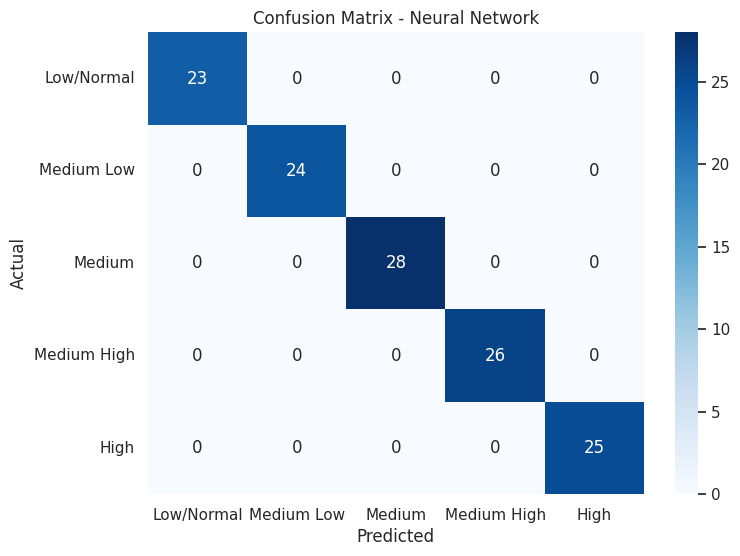

In [31]:
plt.figure(figsize=(8, 6))
labels = ['Low/Normal', 'Medium Low', 'Medium', 'Medium High', 'High']
sns.heatmap(confusion_matrix(y_test, y_pred_ann), annot=True, fmt='d', cmap='Blues',
            xticklabels=labels, yticklabels=labels)
plt.title('Confusion Matrix - Neural Network')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# COMPARATIVE ANALYSIS & MODEL SELECTION


In [32]:
results_df = pd.DataFrame({
    'Model': ['Logistic Regression', 'Support Vector Machine (SVM)', 'Random Forest', 'Neural Network (MLP)'],
    'Accuracy': [lr_acc, svm_acc, rf_acc, ann_acc],
    'Score (%)': [lr_acc*100, svm_acc*100, rf_acc*100, ann_acc*100],
    'Characteristics': ['Simple & Fast (Baseline)', 'Best Boundary Separation', 'Feature Importance (Robust)', 'Complex (Deep Learning)']
})

results_df = results_df.sort_values(by='Accuracy', ascending=False).reset_index(drop=True)
def highlight_max(s):
    is_max = s == s.max()
    return ['background-color: lightgreen' if v else '' for v in is_max]

print("\nModel Leaderboard ")
display(results_df.style.apply(highlight_max, subset=['Accuracy', 'Score (%)']).format({'Accuracy': "{:.4f}", 'Score (%)': "{:.2f}%"}))


Model Leaderboard 


,Model,Accuracy,Score (%),Characteristics
0,Logistic Regression,1.0000,100.00%,Simple & Fast (Baseline)
1,Support Vector Machine (SVM),1.0000,100.00%,Best Boundary Separation
2,Neural Network (MLP),1.0000,100.00%,Complex (Deep Learning)
3,Random Forest,0.9762,97.62%,Feature Importance (Robust)


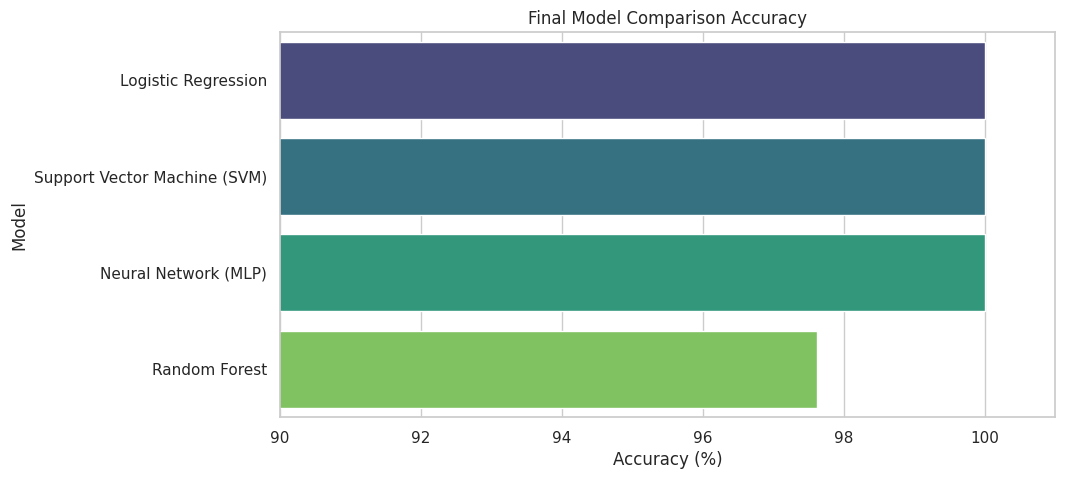

In [33]:
plt.figure(figsize=(10, 5))
sns.barplot(x='Score (%)', y='Model', data=results_df, palette='viridis')
plt.xlim(90, 101) 
plt.title('Final Model Comparison Accuracy')
plt.xlabel('Accuracy (%)')
plt.show()

# MODEL SERIALIZATION FOR DEPLOYMENT


In [34]:
# Persisting the champion model and scaler for Streamlit integration

best_model = svm_model 
filename_model = 'SaYoPillow_Best_Model.pkl'
filename_scaler = 'SaYoPillow_Scaler.pkl'
joblib.dump(best_model, filename_model)
joblib.dump(scaler, filename_scaler)

print(f"Successfully saved model to {filename_model}")
print(f"Successfully saved scaler to {filename_scaler}")
print("\nReady for Deployment!")

Successfully saved model to SaYoPillow_Best_Model.pkl
Successfully saved scaler to SaYoPillow_Scaler.pkl

Ready for Deployment!
